<a href="https://colab.research.google.com/github/GARAM-SHIN/2025-1_CV/blob/main/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lecture 2 : Digital Image Processing**

In [ ]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.5.2
aiohappyeyeballs                   2.6.1
aiohttp                            3.11.15
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.23
albumentations                     2.0.5
ale-py                             0.10.2
altair                             5.5.0
annotated-types                    0.7.0
anyio                              4.9.0
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.7.1
arviz                              0.21.0
astropy                            7.0.1
astropy-iers-data                  0.2025.3.31.0.36.18
astunparse                         1.6.3
atpublic                           5.1
attrs                              25.3.0
audioread            

In [1]:
import cv2    # OpenCV를 사용하기 위해 cv2 import

import numpy as np    # 넘파이 사용
import matplotlib.pyplot as plt    # matplotlib : 시각화 라이브러리

from google.colab.patches import cv2_imshow    # colab에서 cv.imshow 사용

In [2]:
# OpenCV 버전 확인
print("OpenCV version:")
print(cv2.__version__)

OpenCV version:
4.11.0


## **HW #2-1**

In [ ]:
# tiffile 라이브러리 설치 : tif 이미지 포맷을 읽기 위해 필요
!pip install tifffile

In [ ]:
import tifffile as tiff    # tiffile 모듈을 불러옴 : tif 형식의 이미지 파일을 읽기 위해 사용
import numpy as np

In [ ]:
# 깃헙 kjcheoi-class의 cv 리파지토리의 파일 Fig0309(a)(washed_out_aerial_image).tif을 Colab 작업 디렉토리로 다운로드
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0309(a)(washed_out_aerial_image).tif"

--2025-04-07 09:45:07--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0309(a)(washed_out_aerial_image).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 589115 (575K) [image/tiff]
Saving to: ‘Fig0309(a)(washed_out_aerial_image).tif’

Fig0309(a)(washed_o 100%[===================>] 575.31K  --.-KB/s    in 0.05s   

2025-04-07 09:45:07 (10.5 MB/s) - ‘Fig0309(a)(washed_out_aerial_image).tif’ saved [589115/589115]



In [ ]:
# 이미지 불러오기
img = tiff.imread('Fig0309(a)(washed_out_aerial_image).tif')

if img is not None:
    print("이미지를 읽어왔습니다.")
else:
    print("이미지를 읽어오지 못했습니다.")

print(f"변수 타입 : {type(img)}")

이미지를 읽어왔습니다.
변수 타입 : <class 'numpy.ndarray'>


In [ ]:
print(img.shape)    # 이미지 정보 출력

(769, 765)


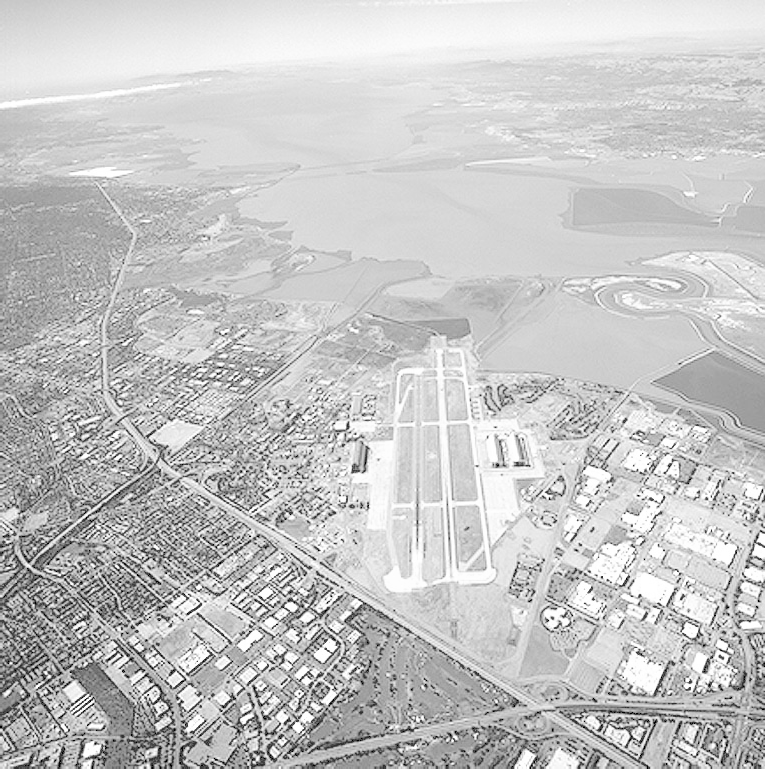

In [ ]:
cv2_imshow(img)    # 이미지 출력

In [ ]:
img_small=cv2.resize(img, dsize=(0,0), fx=0.5, fy=0.5)    # 이미지 크기 축소

In [ ]:
cv2.imwrite('aerial_small.tif', img_small)    # 축소한 이미지 파일 저장

True

In [ ]:
print(img_small.shape)    # 축소한 이미지 정보 추력

(384, 382)


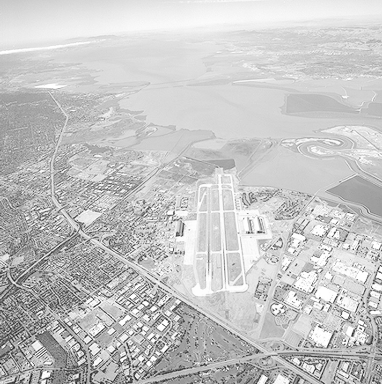

In [ ]:
cv2_imshow(img_small)    # 이미지 출력

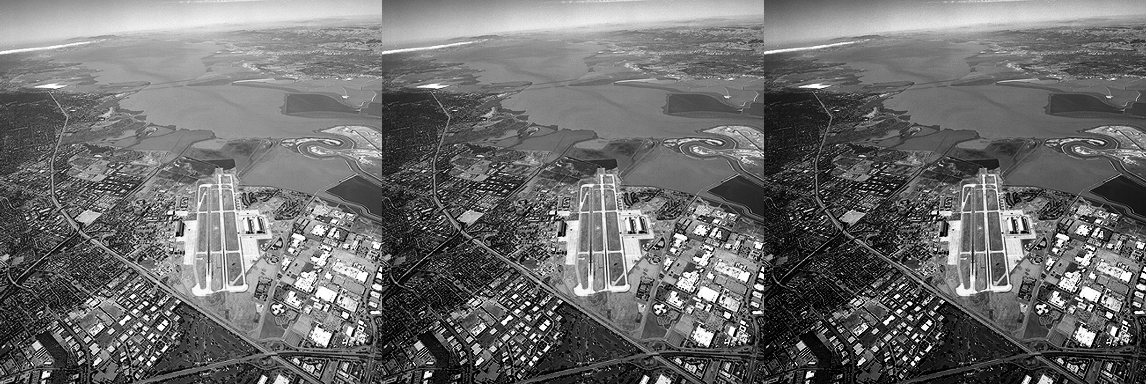

In [ ]:
# 감마(gamma) 보정 함수 정의
# f : 입력 이미지 / gamma : 감마 값
def gamma(f, gamma=1.0):
    f1 = f / 255.0    # 픽셀 값을 0~1 사이의 실수로 정규화
    return np.uint8(255 * (f1 ** gamma))    # 감마 보정 후 다시 0~255 범위로 변환하여 8비트 정수로 반환

# 감마 3.0 적용 : 어둡게 처리됨
# 감마 4.0 적용 : 더 어두움
# 감마 5.0 적용 : 가장 어두움
gc=np.hstack((gamma(img_small,3.0), gamma(img_small,4.0), gamma(img_small,5.0)))

cv2_imshow(gc)    # 감마 보정 결과 이미지 출력

In [ ]:
# 결과 분석 :
# 이미지 좌측부터 각각 감마 3.0, 4.0, 5.0을 적용한 결과가 수평으로 나열되어 있으며, 감마 값이 증가할수록 이미지가 점점 어두워지는 것을 확인할 수 있다.

# 감마 3.0 : 원본보다 전체적으로 어두워졌지만, 주요 객체는 여전히 식별 가능하다.
# 감마 4.0 : 세부적인 텍스처가 더 어두워지며, 그림자나 어두운 영역은 더욱 뚜렷하게 강조되었다.
# 감마 5.0 : 전반적으로 매우 어두워지며, 밝은 부분만이 눈에 띄고 나머지 정보는 많이 사라졌다.

# 감마 보정은 이미지의 밝기를 조절하는 데 유용하며, 저조도 영역이나 밝은 영역을 강조하는 데 활용할 수 있다.
# 적절한 감마 값을 선택하는 것이 중요하며, 과도한 감마 보정은 정보 손실을 유발할 수 있다.

## **HW #2-2**

In [ ]:
# tiffile 라이브러리 설치 : tif 이미지 포맷을 읽기 위해 필요
!pip install tifffile

In [ ]:
import tifffile as tiff    # tiffile 모듈을 불러옴 : tif 형식의 이미지 파일을 읽기 위해 사용
import numpy as np

In [ ]:
# 깃헙 kjcheoi-class의 cv 리파지토리의 파일 Fig0310(b)(washed_out_pollen_image).tif을 Colab 작업 디렉토리로 다운로드
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0310(b)(washed_out_pollen_image).tif"

--2025-04-07 10:46:26--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0310(b)(washed_out_pollen_image).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791311 (773K) [image/tiff]
Saving to: ‘Fig0310(b)(washed_out_pollen_image).tif’

Fig0310(b)(washed_o 100%[===================>] 772.76K  --.-KB/s    in 0.06s   

2025-04-07 10:46:26 (13.6 MB/s) - ‘Fig0310(b)(washed_out_pollen_image).tif’ saved [791311/791311]



In [ ]:
# 이미지 불러오기
img = tiff.imread('Fig0310(b)(washed_out_pollen_image).tif')

if img is not None:
    print("이미지를 읽어왔습니다.")
else:
    print("이미지를 읽어오지 못했습니다.")

print(f"변수 타입 : {type(img)}")

이미지를 읽어왔습니다.
변수 타입 : <class 'numpy.ndarray'>


In [ ]:
print(img.shape)    # 이미지 정보 출력

(889, 889)


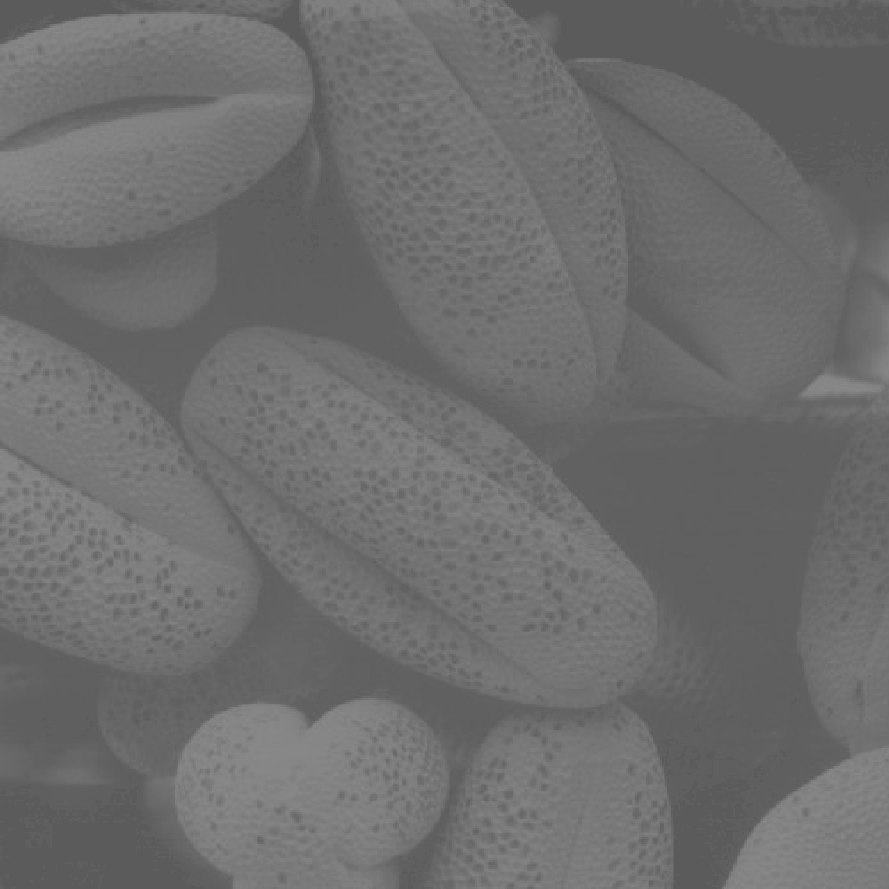

In [ ]:
cv2_imshow(img)    # 이미지 출력

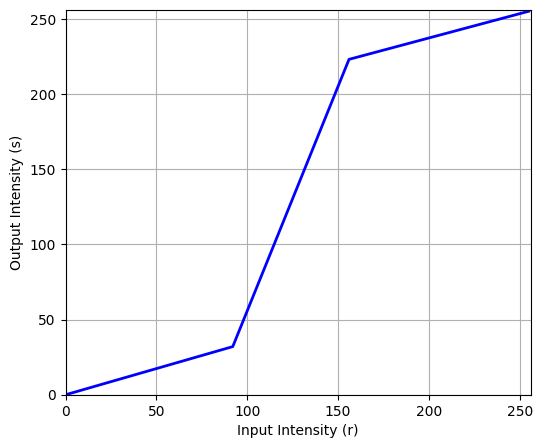

In [ ]:
# 변환 함수의 기준점 설정
r1, s1 = 92, 32    # r1, s1 : 첫 번째 꺾이는 지점
r2, s2 = 156, 223    # r2, s2 : 두 번째 꺾이는 지점

# 입력값 0~255 범위
r_values = np.arange(0, 256)
s_values = []

# Piecewise-Linear Transformation 수식 적용
for r in r_values:
    if r <= r1:    # 첫 번째 구간
        s = (s1 / r1) * r
    elif r1 < r <= r2:    # 두 번째 구간
        s = ((s2 - s1) / (r2 - r1)) * (r - r1) + s1
    else:    # 세 번째 구간
        s = ((255 - s2) / (255 - r2)) * (r - r2) + s2
    s_values.append(s)

# 그래프 출력
plt.figure(figsize=(6, 5))
plt.plot(r_values, s_values, color='blue', linewidth=2)
plt.xlabel('Input Intensity (r)')    # x축
plt.ylabel('Output Intensity (s)')    # y축
plt.grid(True)
plt.xlim(0, 256)
plt.ylim(0, 256)
plt.show()    # 그래프 출력

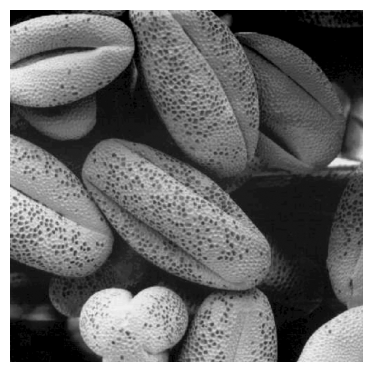

In [ ]:
# r1, s1, r2, s2 기준에 따라 입력 이미지의 명암을 선형 구간별로 변환
transformed = piecewise_linear_transform(img, r1, s1, r2, s2)

# 변환된 이미지 출력
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2), plt.imshow(transformed, cmap='gray'), plt.axis('off')    # 1행 2열 중 두 번째 위치 / 축 비표시
plt.show()

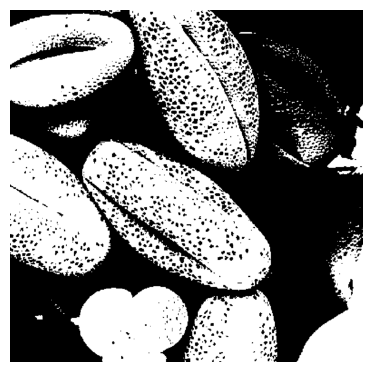

In [ ]:
# 이진화 수행
threshold_value = 110    # 임계값 설
_, thresholded = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)

# 이진화 이미지 출력
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2), plt.imshow(thresholded, cmap='gray'), plt.axis('off')    # 1행 2열 중 두 번째 위치 / 축 제거
plt.show()

In [ ]:
# 결과 분석 :

# Picewise-Linear Transform
# 이미지의 픽셀 값을 세 구간으로 나누어 선형적으로 조정함으로써, 명암 대비를 효과적으로 향상시켰다.
# r1 = 70, r2 = 180, s1 = 30, s2 = 255로 설정함으로써 중간 밝기 영역의 대비가 크게 증가되도록 하였다.
# 원본 이미지에서는 뚜렷하지 않았던 구조적인 디테일들이 더욱 뚜렷하게 나타났으며, 어두운 영역은 지나치게 밝아지지 않아 이미지가 보다 선명하고 시각적으로 균형 잡힌 형태로 변환하였다.

# 이진화
# 픽셀 값을 기준으로 두 가지 값으로만 표현하여 객체와 배경을 분리하였다.
# 임계값을 110으로 설정하여, 이 값을 초과하는 픽셀은 흰색으로, 이하인 픽셀은 검정으로 변환하였다.
# 이미지 내에서 상대적으로 밝은 영역이 강조되어 주요 구조나 객체가 추출된 반면, 세부적인 디텔일 등이 사라졌다.
# 임계값의 크기에따라 결과 품질이 크게 달라진다는 것을 알 수 있다.

## **HW #2-3**

In [ ]:
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/lena.jpg"

--2025-04-08 12:28:56--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/lena.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91814 (90K) [image/jpeg]
Saving to: ‘lena.jpg’

lena.jpg            100%[===================>]  89.66K  --.-KB/s    in 0.02s   

2025-04-08 12:28:56 (3.69 MB/s) - ‘lena.jpg’ saved [91814/91814]



In [ ]:
# 이미지 불러오기
img = cv2.imread('lena.jpg')

if img is not None:
    print("이미지를 읽어왔습니다.")
else:
    print("이미지를 읽어오지 못했습니다.")
print(f"변수 타입: {type(img)}")

이미지를 읽어왔습니다.
변수 타입: <class 'numpy.ndarray'>


In [ ]:
print(img.shape)    # 이미지 정보 출력

(1200, 1600, 3)


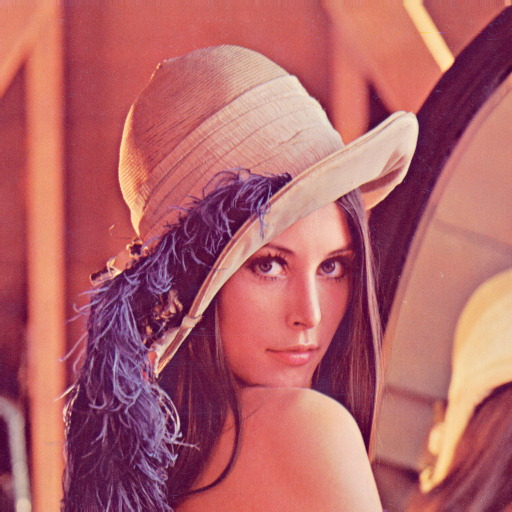

In [ ]:
cv2_imshow(img)    # 이미지 출력

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    # 이미지 그레이스케일로 변환

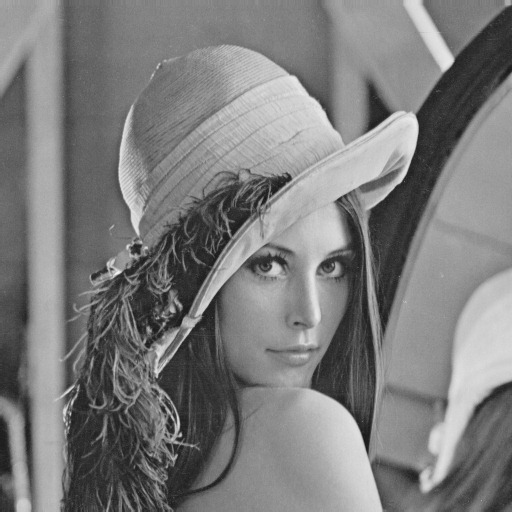

In [ ]:
cv2_imshow(gray)    # 그레이스케일로 변환한 이미지 출력

In [ ]:
# 이미지 파일로 저장
cv2.imwrite("lena_gray.jpg",gray)

True

In [ ]:
print(gray.shape)    # 이미지 정보 출력

(512, 512)


In [ ]:
from scipy.signal import convolve2d

box_filter = np.ones((3,3))/9    # 3*3 박스 필터 : 평균 필터

# 5*5 가우시안 필터
gaussian_filter = np.array([
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0219, 0.0983, 0.1621, 0.0983, 0.0219],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030]
])

# 라플라시안 필터: 4방향 - 상하좌우 기준 엣지 강조
laplacian_4 = np.array([
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
])

# 라플라시안 필터 : 8방향 - 대각선 포함 엣지 강조
laplacian_8 = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# 엠보싱 필터 : 빛이 오른쪽 아래에서 비추는 듯한 효과
emboss_1 = np.array([
    [-1, 0,  0],
    [0,  0,  0],
    [ 0, 0,  1]
])

# 엠보싱 필터 : 좀 더 부드러운 방향성 있는 효과
emboss_2 = np.array([
    [-1, -1,  0],
    [-1,  0,  1],
    [ 0,  1,  1]
])

In [ ]:
# 각 필터 적용
filtered_box = convolve2d(gray, box_filter, mode='same', boundary='symm')
filtered_gaussian = convolve2d(gray, gaussian_filter, mode='same', boundary='symm')
filtered_laplacian_4 = convolve2d(gray, laplacian_4, mode='same', boundary='symm')
filtered_laplacian_8 = convolve2d(gray, laplacian_8, mode='same', boundary='symm')
filtered_emboss_1 = convolve2d(gray, emboss_1, mode='same', boundary='symm')
filtered_emboss_2 = convolve2d(gray, emboss_2, mode='same', boundary='symm')

In [ ]:
# 시각화를 위한 리스트로 묶기
titles = [
    'Box Filter', 'Gaussian Filter',
    'Laplacian 4-neighbor', 'Laplacian 8-neighbor',
    'Emboss Filter 1', 'Emboss Filter 2'
]

# 필터 적용 결과 이미지들
images = [
    filtered_box, filtered_gaussian,
    filtered_laplacian_4, filtered_laplacian_8,
    filtered_emboss_1, filtered_emboss_2
]

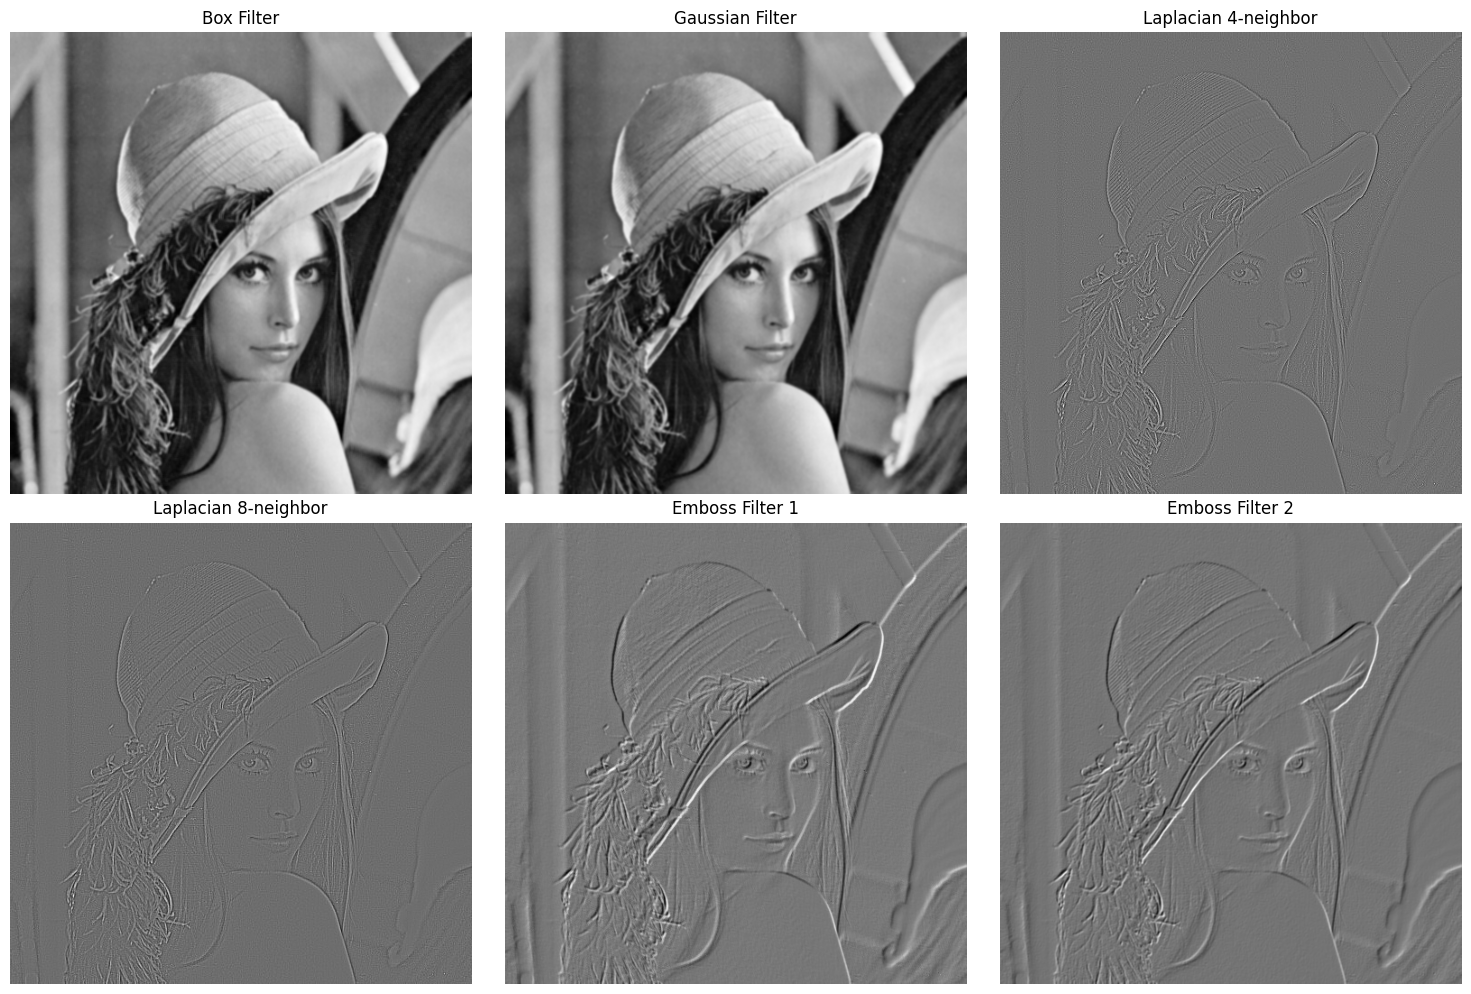

In [ ]:
# 필터링 결과 출력
plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# 결과 분석 :

# 박스 필터 (평균 필터)
# 3*3 크기의 커널에서 모든 값을 평균 내어 중심 픽셀을 대체한다.
# 이미지가 전체적으로 부드럽게 흐려지며, 노이즈를 줄이는 데 유용하지만 가장자리나 윤곽이 많이 흐려진다.

# 가우시안 필터
# 가중 평균 필터로, 중심에 가까울수록 더 큰 가중치를 부여한다.
# 자연스러운 흐림 효과를 제공하며, 박스 필터보다 덜 거칠고 더 부드럽기에 노이즈 제거에 효과적이다.

# 4방향 라플라시안 필터
# 픽셀의 상하좌우와의 차이를 이용해 에지를 검출한다.
# 윤곽선이 강조되며, 특히 경계가 뚜렷한 부분에서 강한 반응을 보인다.
# 배경은 어두워지고, 경계선이 밝게 표현되어 경계 검출이 잘 이루어진다.

# 8방향 라플라시안 필터
# 대각선 방향까지 포함해 에지를 검출한다.
# 복합적인 경계 추출이 가능하며, 텍스처나 세부 윤곽에 민감하게 반응하여 이미지의 구조적 요소를 강하게 드러낸다.

# 엠보싱 핕터 1
# 빛이 한 방향에서 비치는 듯한 효과를 내며, 이미지에 입체감을 부여한다.
# 밝기 차이를 강조하여 음영 효과를 표현하고, 깊이감과 방향성이 있는 표면처럼 보이게 한다.

# 엠보싱 필터 2
# 여러 방향의 밝기 차이를 고려하여 조금 더 사실적인 입체 효과를 부여한다.
# 전반적으로 강한 입체 효과가 나타나며, 윤곽선 강조와 함께 밝고 어두운 부분이 명확하게 구분된다.

## **HW #2-4**

In [ ]:
# 깃헙 kjcheoi-class의 cv 리파지토리의 파일 school.jpg을 Colab 작업 디렉토리로 다운로드
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/school.jpg"

--2025-04-08 12:29:35--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/school.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824868 (806K) [image/jpeg]
Saving to: ‘school.jpg’

school.jpg          100%[===================>] 805.54K  --.-KB/s    in 0.06s   

2025-04-08 12:29:36 (13.5 MB/s) - ‘school.jpg’ saved [824868/824868]



In [ ]:
# 이미지 불러오기
img = cv2.imread('school.jpg')

if img is not None:
    print("이미지를 읽어왔습니다.")
else:
    print("이미지를 읽어오지 못했습니다.")
print(f"변수 타입: {type(img)}")

이미지를 읽어왔습니다.
변수 타입: <class 'numpy.ndarray'>


In [ ]:
print(img.shape)    # 이미지 정보 출력

(1200, 1600, 3)


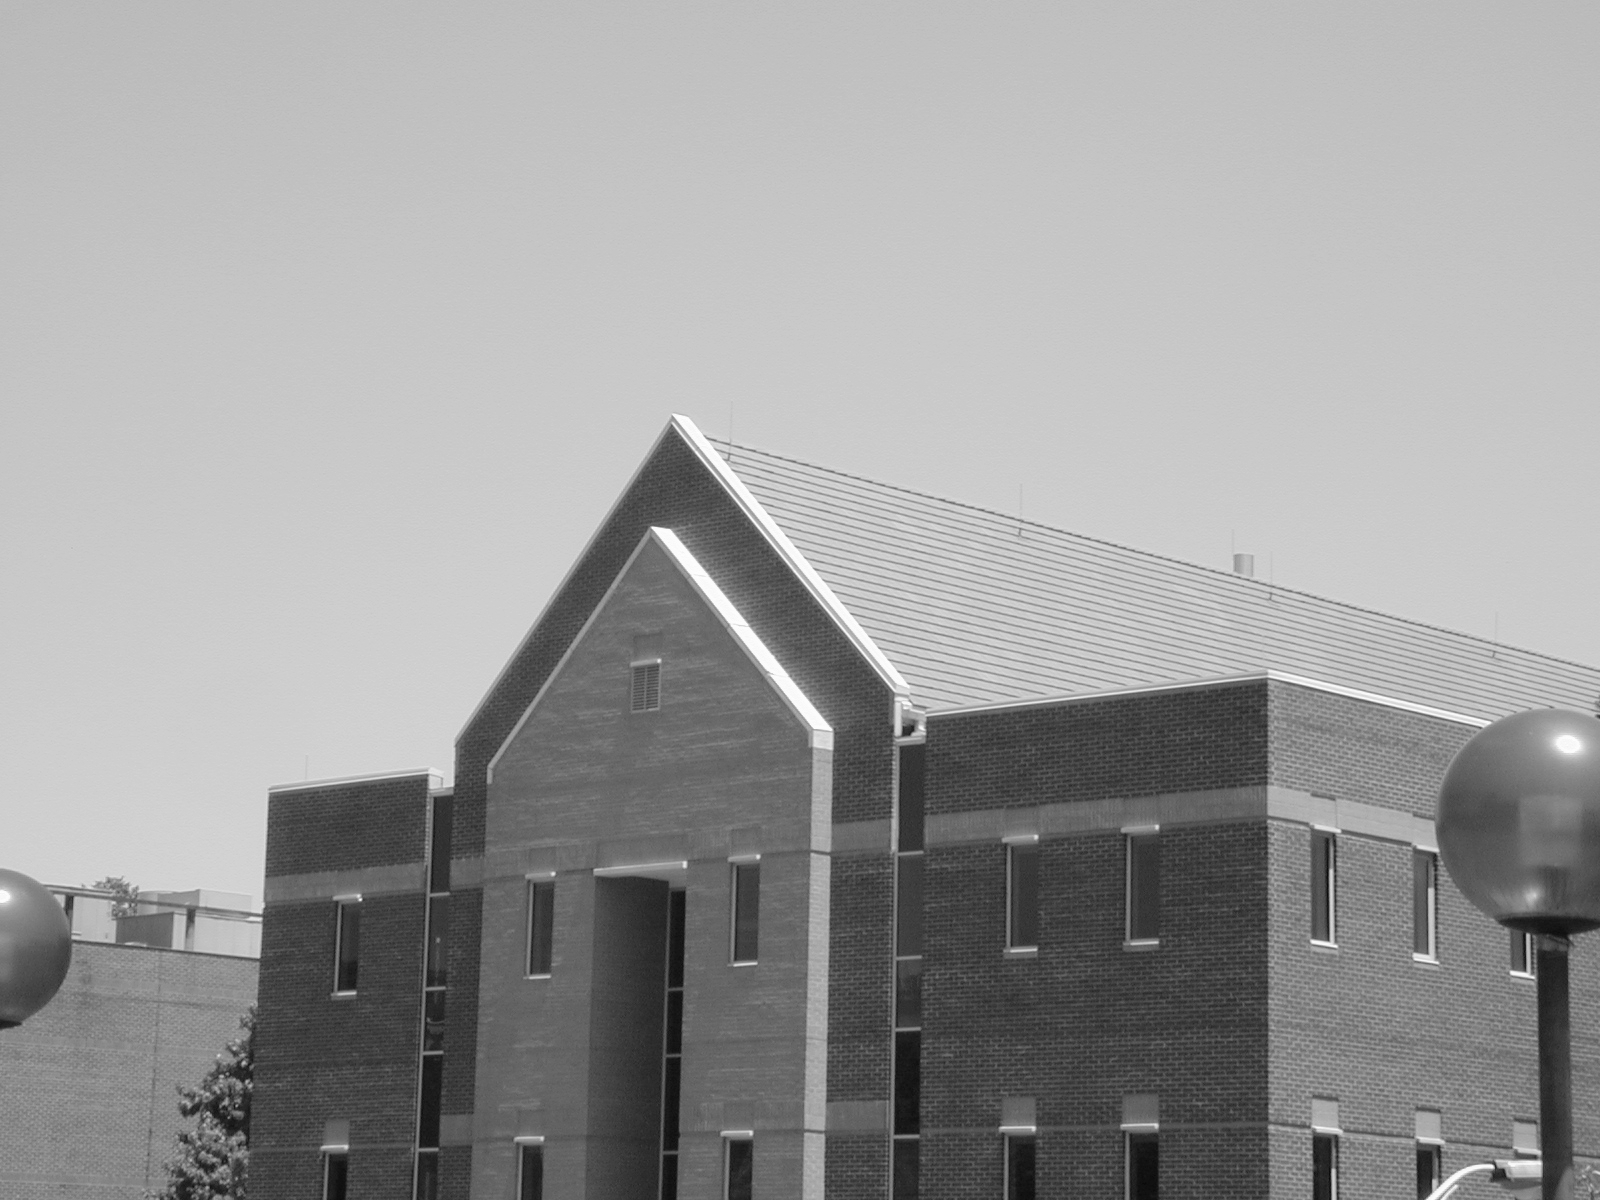

In [ ]:
cv2_imshow(img)    # 이미지 출력

In [ ]:
# 45° 방향 대각선 마스크
sobel_45 = np.array([
    [-1, 0, 1],
    [ 0, 1, 0],
    [ 1, 0,-1]
])

# -45° 방향 대각선 마스크
sobel_neg45 = np.array([
    [ 1, 0,-1],
    [ 0, 1, 0],
    [-1, 0, 1]
])

In [ ]:
edge_45 = cv2.filter2D(img, -1, sobel_45)    # 45°방향 대각선 마스크를 이미지에 적용
edge_neg45 = cv2.filter2D(img, -1, sobel_neg45)    # -45°방향 대각선 마스크를 이미지에 적용

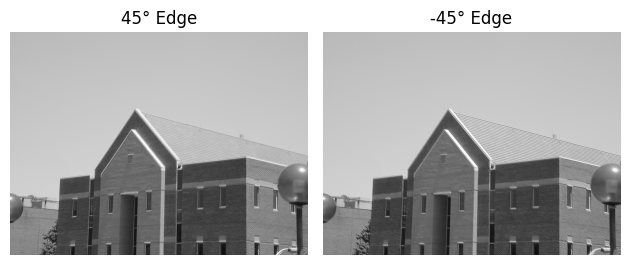

In [ ]:
# 결과 이미지 출력
plt.subplot(1, 2, 1)
plt.title("45° Edge")
plt.imshow(edge_45)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("-45° Edge")
plt.imshow(edge_neg45)
plt.axis('off')

plt.tight_layout()
plt.show()

## **HW #2-5**

In [3]:
# 깃헙 kjcheoi-class의 cv 리파지토리의 파일 finger.jpg을 Colab 작업 디렉토리로 다운로드
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/finger.jpg"

--2025-04-12 03:51:13--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/finger.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73452 (72K) [image/jpeg]
Saving to: ‘finger.jpg’

finger.jpg          100%[===================>]  71.73K  --.-KB/s    in 0.01s   

2025-04-12 03:51:13 (5.42 MB/s) - ‘finger.jpg’ saved [73452/73452]



In [4]:
# 이미지 불러오기
img = cv2.imread('finger.jpg')

if img is not None:
    print("이미지를 읽어왔습니다.")
else:
    print("이미지를 읽어오지 못했습니다.")
print(f"변수 타입: {type(img)}")

이미지를 읽어왔습니다.
변수 타입: <class 'numpy.ndarray'>


In [5]:
print(img.shape)    # 이미지 정보 출력

(238, 315, 3)


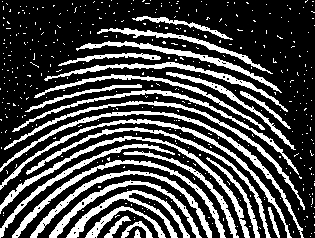

In [6]:
cv2_imshow(img)    # 이미지 출력

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    # 이미지를 그레이스케일로 변환

In [ ]:
_, bin_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)    # Otsu 이진화 처리

In [50]:
# 3*3 사각형 구조 요소 정의
se = np.uint8([[1, 1, 1],
               [1, 1, 1],
               [1, 1, 1]])

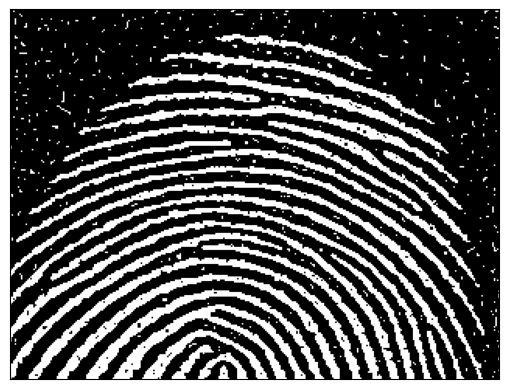

In [ ]:
# 그레이스케일로 변환한 이미지 출력
plt.imshow(gray, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

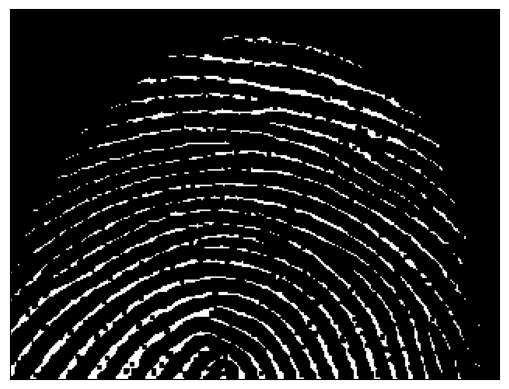

In [ ]:
# 침식(Erosion) 수행 및 결과 출력
eroded = cv2.erode(bin_img, se, iterations=1)
plt.imshow(eroded, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

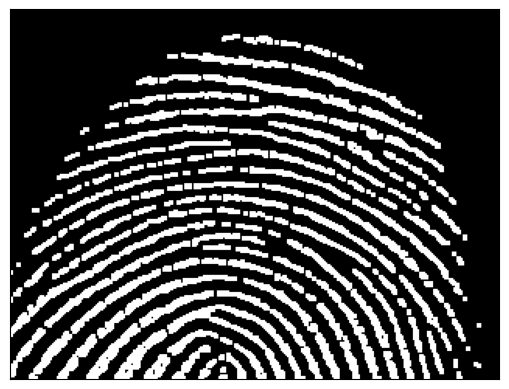

In [ ]:
# 열림(Opening) 수행 및 결과 출력 : 침식 후 팽창 적용
opened = cv2.dilate(eroded, se, iterations=1)
plt.imshow(opened, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

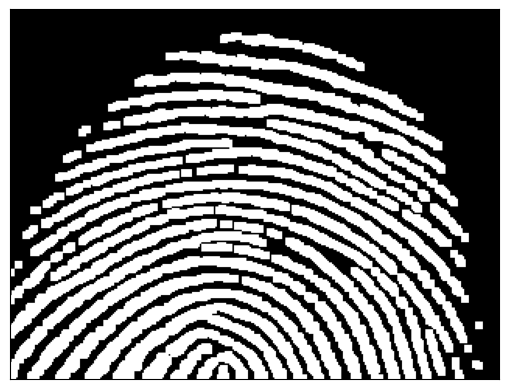

In [ ]:
# 팽창(Dilation) 수행 및 결과 출력
dilated = cv2.dilate(opened, se, iterations=1)
plt.imshow(dilated, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

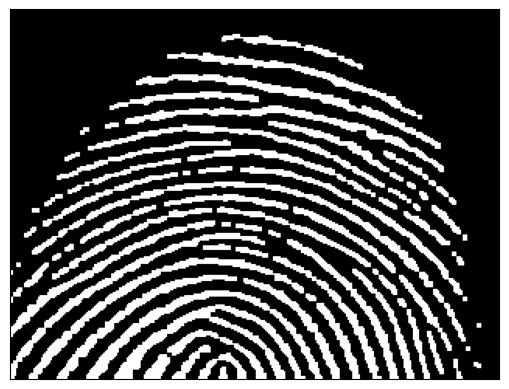

In [ ]:
# 닫힘(Closing) 수행 및 결과 출력 : 팽창 후 침식 적용
closed = cv2.erode(dilated, se, iterations=1)
plt.imshow(closed, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# 결과 분석 :
# 이진화 : Ostu 알고리즘을 이용하여 배경과 객체를 명확히 구분할 수 있다.
# 침식(Erosion) : 객체의 외곽이 줄어들어 작은 잡음을 줄일 수 있다.
# 열림(Opening) : 침식 후 팽창으로 노이즈 제거와 윤곽 정리를 수행한다.
# 팽창(Dilation) : 객체를 넓혀 끊긴 부분을 연결하거나 강조한다.
# 닫힘(Closing) : 팽창 후 침식으로 작은 구멍을 메워 형태를 보존한다.

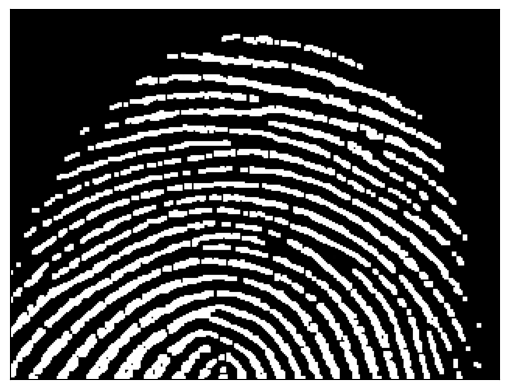

In [61]:
# 또 다른 방법 적용
# 3*3 사각형 구조 요소 정의
se = np.uint8([[1, 1, 1],
               [1, 1, 1],
               [1, 1, 1]])

# Top-hat 연산 : 노이즈 강조
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, se)

# 원본에서 Top-hat 결과 빼기 : 노이즈 제거
result = cv2.subtract(img, tophat)

# 결과 이미지로출력
plt.imshow(result, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# 결과 분석 :
# Top - hat 연산 : Open 연산으로 이미지의 배경을 추정하고 원본에서 이를 빼 결과적으로 노이즈만 추출하였다
# Top - hat 결과를 원본에서 빼어 원본에서 노이즈를 제거하였다

## **HW #2-6**

In [ ]:
import tifffile as tiff    # tiffile 모듈을 불러옴 : tif 형식의 이미지 파일을 읽기 위해 사용
import numpy as np

In [ ]:
# 깃헙 kjcheoi-class의 cv 리파지토리의 파일 Fig0905(a)(wirebond-mask).tif을 Colab 작업 디렉토리로 다운로드
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0905(a)(wirebond-mask).tif"

--2025-04-11 16:29:22--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0905(a)(wirebond-mask).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30092 (29K) [image/tiff]
Saving to: ‘Fig0905(a)(wirebond-mask).tif.1’

Fig0905(a)(wirebond 100%[===================>]  29.39K  --.-KB/s    in 0.003s  

2025-04-11 16:29:23 (8.80 MB/s) - ‘Fig0905(a)(wirebond-mask).tif.1’ saved [30092/30092]



In [ ]:
# 이미지 불러오기
img = tiff.imread('Fig0905(a)(wirebond-mask).tif')

if img is not None:
    print("이미지를 읽어왔습니다.")
else:
    print("이미지를 읽어오지 못했습니다.")

print(f"변수 타입 : {type(img)}")

이미지를 읽어왔습니다.
변수 타입 : <class 'numpy.ndarray'>


In [ ]:
print(img.shape)    # 이미지 정보 출력

(486, 486)


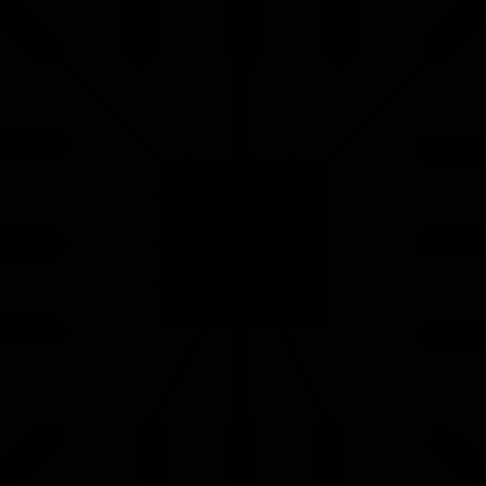

In [ ]:
cv2_imshow(img)    # 이미지 출력

In [ ]:
img = img.astype(np.uint8)    # 이미지 타입을 uint8로 변환 : Otsu 이진화를 적용하기 위함
_, bin_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)    # Otsu 이진화 처리

In [ ]:
# 다양한 커널 크기를 사용한 침식 연산 결과를 저장할 리스트
sizes = [11, 15, 45]
erosions = []

# 각 커널 크기에 대해 침식 연산 수행
for size in sizes:
    se = np.ones((size, size), np.uint8)    # size*size 크기의 사각형 구조 요소 생성
    eroded = cv2.erode(bin_img, se, iterations=1)    # 침식 연산 적용
    erosions.append(eroded)    # 결과 저장

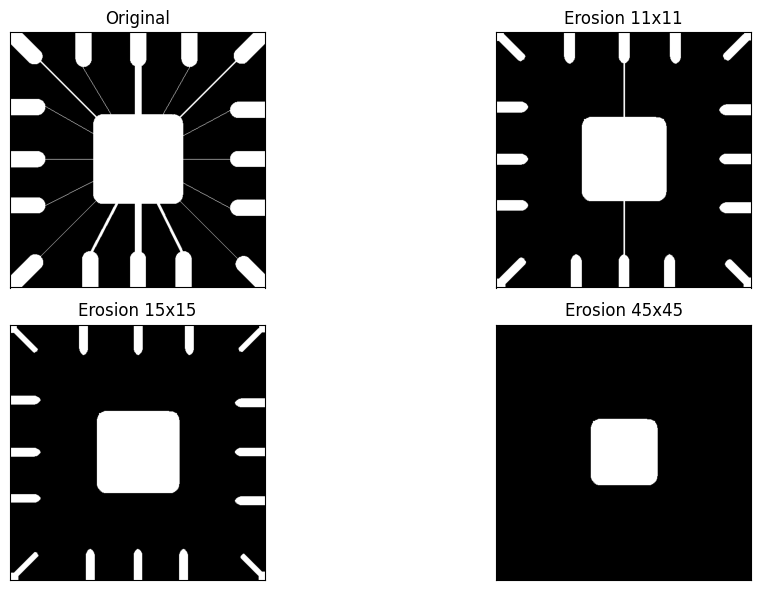

In [ ]:
# 침식 연산 결과 이미지 출력
titles = ['Original'] + [f'Erosion {size}x{size}' for size in sizes]
images = [bin_img] + erosions

plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

In [ ]:
# 결과 분석

# Erosion 11*11
# 비교적 큰 영역을 기준으로 객체 영역에서부터 내부까지 현재 픽셀이 줄어들어 얇은 선이나 좁은 부분은 사라질 수 있다
# 작은 노이즈 제거 효과 있고, 객체 윤곽이 약간 줄어든다

# Erosion 15*15
# 연결된 부분이 끊어지거나 완전히 제거되어 세밀한 부분이나 좁은 구조는 거의 남아있지 않다

# Erosion 45*45
# 작은 객체는 완전히 사라지고, 큰 객체도 중심부만 남은 모습이다
# 노이즈 제거에는 효과적이나, 객체 경계 뿐만 아니라 중심까지 침식되어 형태를 유지하기 어렵다

## **HW #2-7**

In [ ]:
import tifffile as tiff    # tiffile 모듈을 불러옴 : tif 형식의 이미지 파일을 읽기 위해 사용
import numpy as np

In [ ]:
# 깃헙 kjcheoi-class의 cv 리파지토리의 파일 Fig0939(a)(headCT-Vandy).tif을 Colab 작업 디렉토리로 다운로드
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0939(a)(headCT-Vandy).tif"

--2025-04-09 11:16:33--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0939(a)(headCT-Vandy).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262750 (257K) [image/tiff]
Saving to: ‘Fig0939(a)(headCT-Vandy).tif’

Fig0939(a)(headCT-V 100%[===================>] 256.59K  1.55MB/s    in 0.2s    

2025-04-09 11:16:34 (1.55 MB/s) - ‘Fig0939(a)(headCT-Vandy).tif’ saved [262750/262750]



In [ ]:
# 이미지 불러오기
img = tiff.imread('Fig0939(a)(headCT-Vandy).tif')

if img is not None:
    print("이미지를 읽어왔습니다.")
else:
    print("이미지를 읽어오지 못했습니다.")

print(f"변수 타입 : {type(img)}")

이미지를 읽어왔습니다.
변수 타입 : <class 'numpy.ndarray'>


In [ ]:
print(img.shape)    # 이미지 정보 출력

(512, 512)


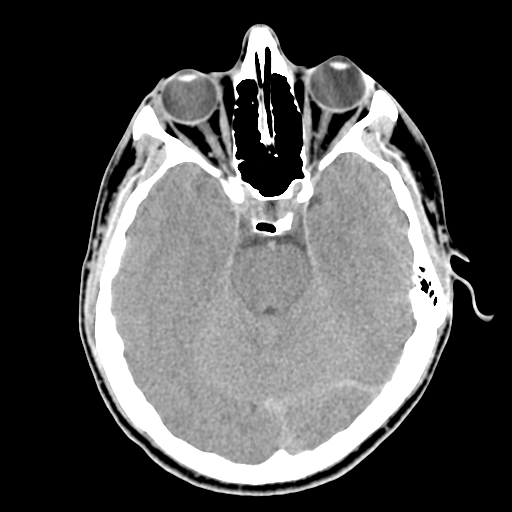

In [ ]:
cv2_imshow(img)    # 이미지 출력

In [ ]:
img = img.astype(np.uint8)    # 이미지 타입을 uint8로 변환 : OpenCV 함수들이 요구하는 형식에 맞추기 위함

In [ ]:
# 소벨 에지 검출 : x방향과 y방향 경계 검출 후, 두 결과를 결합
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)

# 라플라시안 에지 검출
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# 캐니 에지 검출
canny = cv2.Canny(img, 100, 200)

# 형태학적 그래디언트 (Morphological Gradient)
kernel = np.ones((3,3), np.uint8)
dilate = cv2.dilate(img, kernel, iterations=1)
erode = cv2.erode(img, kernel, iterations=1)
morph_gradient = cv2.absdiff(dilate, erode)

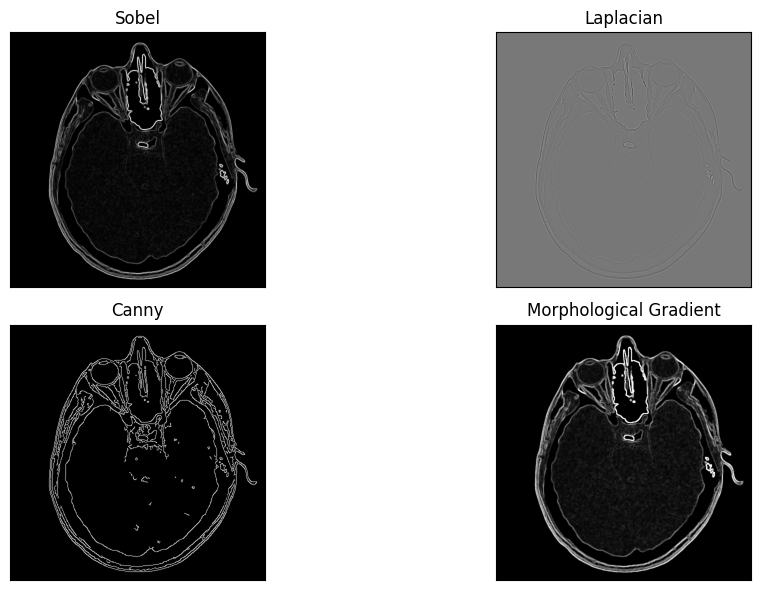

In [ ]:
# 에지 검출 결과 이미지로 출력
titles = ['Sobel', 'Laplacian', 'Canny', 'Morphological Gradient']
images = [sobel, laplacian, canny, morph_gradient]

plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

In [ ]:
# 결과 비교 분석 :
# Sobel : 수평 및 수직 방향의 경계선 검출에 강하며, 가장자리의 기울기 정보를 강조해 부드러운 경계가 표현된다. 노이즈에 다소 민감하다
# Laplacian : 2차 미분 기반으로 중심이 강조된 에지를 검출하며, 소벨 보다 경계가 더 뚜렷하지만 노이즈에 매우 민감하다
# Canny : 가장 정밀한 에지 검출 결과를 제공하며, 노이즈 억제, 이중 임계값 등을 통해 깔끔하고 연속적인 경계선을 출력한다
# Morphological Gradient : 팽창과 침식의 차이를 이용해 물체 외곽선만 추출하며, 다른 필터에 비해 이진 이미지에 적합하고 내부 세부 정보는 무시된다

## **HW #2-8**

In [ ]:
import tifffile as tiff    # tiffile 모듈을 불러옴 : tif 형식의 이미지 파일을 읽기 위해 사용
import numpy as np

In [ ]:
# 깃헙 kjcheoi-class의 cv 리파지토리의 파일 Fig0938(a)(cygnusloop_Xray_original).tif을 Colab 작업 디렉토리로 다운로드
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0938(a)(cygnusloop_Xray_original).tif"

--2025-04-09 11:31:29--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0938(a)(cygnusloop_Xray_original).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 321002 (313K) [image/tiff]
Saving to: ‘Fig0938(a)(cygnusloop_Xray_original).tif’

Fig0938(a)(cygnuslo 100%[===================>] 313.48K  1.83MB/s    in 0.2s    

2025-04-09 11:31:31 (1.83 MB/s) - ‘Fig0938(a)(cygnusloop_Xray_original).tif’ saved [321002/321002]



In [ ]:
# 이미지 불러오기
img = tiff.imread('Fig0938(a)(cygnusloop_Xray_original).tif')

if img is not None:
    print("이미지를 읽어왔습니다.")
else:
    print("이미지를 읽어오지 못했습니다.")

print(f"변수 타입 : {type(img)}")

이미지를 읽어왔습니다.
변수 타입 : <class 'numpy.ndarray'>


In [ ]:
print(img.shape)    # 이미지 정보 출력

(566, 566)


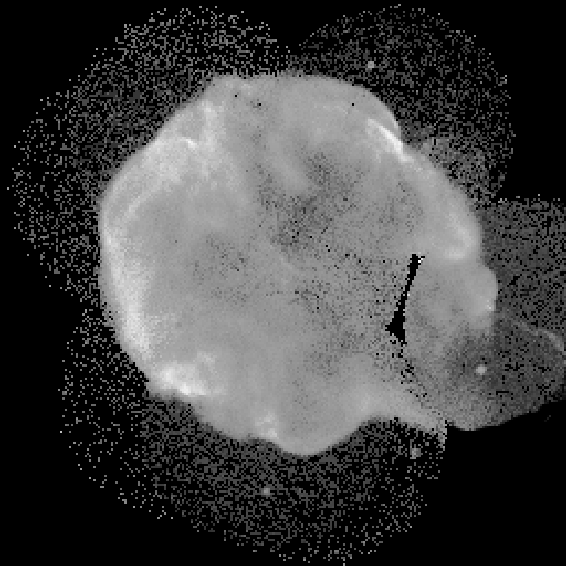

In [ ]:
cv2_imshow(img)    # 이미지 출력

In [ ]:
# 커널(구조 요소) 정의 : 5*5 크기의 정사각형 형태
kernel = np.ones((5, 5), np.uint8)

# 형태학적 스무딩 : Open 후 Close를 적용하여 노이즈 제거
morph_smoothed = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)    # 작은 점이나 돌기를 제거함
morph_smoothed = cv2.morphologyEx(morph_smoothed, cv2.MORPH_CLOSE, kernel)    # 작은 구멍 채우기

# 스무딩 필터 적용
smooth_filtered = cv2.blur(img, (5, 5))

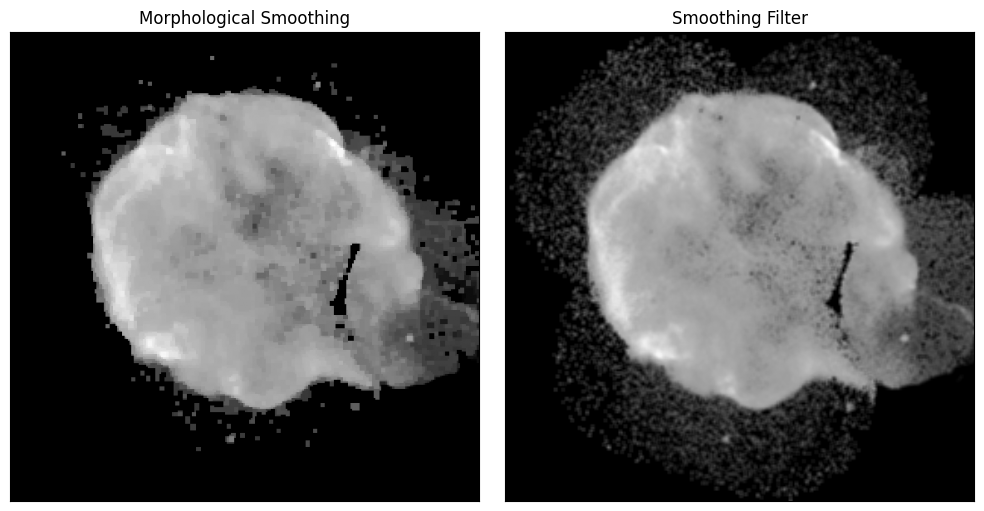

In [ ]:
# 결과 이미지 출력
titles = ['Morphological Smoothing', 'Smoothing Filter']
images = [morph_smoothed, smooth_filtered]

plt.figure(figsize=(15, 5))
for i in range(2):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

In [ ]:
# 결과 비교 분석

# Morphological Smoothing
# 국소적인 점 노이즈나 작은 구멍을 효과적으로 제거한다
# 구조화된 잡음 처리에 유리하다

# Smoothing Filter
# 전체적으로 이미지가 부드러워지며 노이즈가 흐려진다
# 이미지의 경계가 흐릿해질 수 있다

## **HW #2-9**

In [ ]:
import tifffile as tiff    # tiffile 모듈을 불러옴 : tif 형식의 이미지 파일을 읽기 위해 사용
import numpy as np

In [ ]:
# 깃헙 kjcheoi-class의 cv 리파지토리의 파일 Fig0940(a)(rice_image_with_intensity_gradient).tif을 Colab 작업 디렉토리로 다운로드
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0940(a)(rice_image_with_intensity_gradient).tif"

--2025-04-09 12:30:02--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0940(a)(rice_image_with_intensity_gradient).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 360574 (352K) [image/tiff]
Saving to: ‘Fig0940(a)(rice_image_with_intensity_gradient).tif’

Fig0940(a)(rice_ima 100%[===================>] 352.12K  1.80MB/s    in 0.2s    

2025-04-09 12:30:04 (1.80 MB/s) - ‘Fig0940(a)(rice_image_with_intensity_gradient).tif’ saved [360574/360574]



In [ ]:
# 이미지 불러오기
img = tiff.imread('Fig0940(a)(rice_image_with_intensity_gradient).tif')

if img is not None:
    print("이미지를 읽어왔습니다.")
else:
    print("이미지를 읽어오지 못했습니다.")

print(f"변수 타입 : {type(img)}")

이미지를 읽어왔습니다.
변수 타입 : <class 'numpy.ndarray'>


In [ ]:
print(img.shape)    # 이미지 정보 출력

(600, 600)


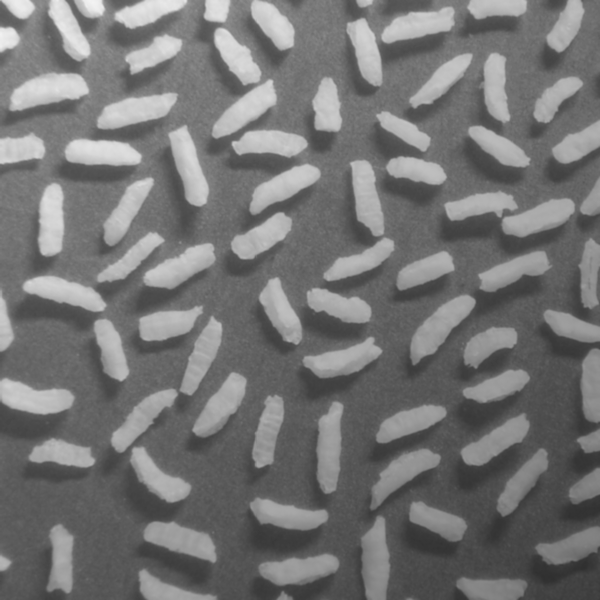

In [ ]:
cv2_imshow(img)    # 이미지 출력

(np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5))

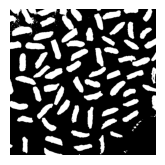

In [ ]:
# Otsu의 이진화 적용
_, bin_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.subplot(2, 3, 2)
plt.imshow(bin_otsu, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5))

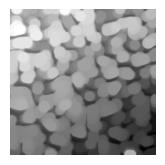

In [ ]:
# 열림 연산을 통해 배경 추출
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (40, 40))    # 타원형 구조 요소 생성

background = cv2.morphologyEx(img, cv2.MORPH_OPEN, se)
plt.subplot(2, 3, 3)
plt.imshow(background, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5))

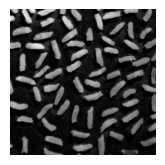

In [ ]:
# 원본 이미지에서 배경을 빼서 Top-hat 변환 수행
tophat = cv2.subtract(img, background)

plt.subplot(2, 3, 4)
plt.imshow(tophat, cmap='gray')
plt.axis('off')

(np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5))

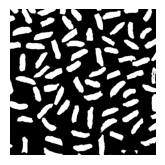

In [ ]:
# Top-hat 변환 결과에 Otsu의 이진화 적용
_, bin_tophat_otsu = cv2.threshold(tophat, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.subplot(2, 3, 5)
plt.imshow(bin_tophat_otsu, cmap='gray')
plt.axis('off')

In [ ]:
# 결과 비교 분석 :

# Otsu 이진화
# 이미지 전체를 이진화하여 물체와 배경을 분리한다
# 경계가 분명한 고대비 이미지에서는 배경은 검정, 객체는 하얀색으로 뚜렷하게 나온다
# 조명이 불균일하거나 배경이 복잡한 경우, 임계값 결정이 어려워 객체가 일부 누락되거나 불필요한 배경이 포함될 수 있다

# Top-hat 변환
# 배경에서 상대적으로 밝은 부분만 추출하기에, 미세한 밝기 특징을 찾아내는 데 적합하다
# 이미지에서 밝은 부분만 부각되어 보이고, 나머지는 어둡게 보인다
# 밝은 객체만을 강조하기 때문에, 배경은 어두워지고 관심 있는 밝은 영역만 밝게 표현되기에 세부 구조를 강조하는 데 유리한 방법이다

## **HW #2-10**

In [ ]:
import tifffile as tiff    # tiffile 모듈을 불러옴 : tif 형식의 이미지 파일을 읽기 위해 사용
import numpy as np

In [ ]:
# 깃헙 kjcheoi-class의 cv 리파지토리의 파일 Fig0943(a)(dark_blobs_on_light_background).tif을 Colab 작업 디렉토리로 다운로드
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0943(a)(dark_blobs_on_light_background).tif"

--2025-04-11 13:32:48--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0943(a)(dark_blobs_on_light_background).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 360678 (352K) [image/tiff]
Saving to: ‘Fig0943(a)(dark_blobs_on_light_background).tif’

Fig0943(a)(dark_blo 100%[===================>] 352.22K  --.-KB/s    in 0.04s   

2025-04-11 13:32:48 (9.41 MB/s) - ‘Fig0943(a)(dark_blobs_on_light_background).tif’ saved [360678/360678]



In [ ]:
# 이미지 불러오기
img = tiff.imread('Fig0943(a)(dark_blobs_on_light_background).tif')

if img is not None:
    print("이미지를 읽어왔습니다.")
else:
    print("이미지를 읽어오지 못했습니다.")

print(f"변수 타입 : {type(img)}")

이미지를 읽어왔습니다.
변수 타입 : <class 'numpy.ndarray'>


In [ ]:
print(img.shape)    # 이미지 정보 출력

(600, 600)


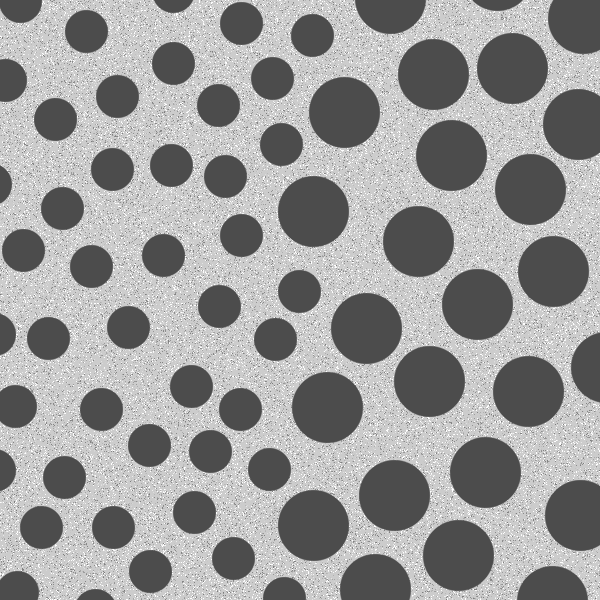

In [ ]:
cv2_imshow(img)    # 이미지 출력

(np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5))

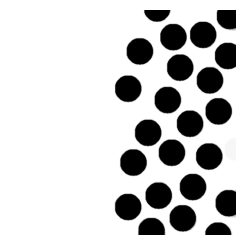

In [ ]:
# 작은 구조 요소 정의 (작은 얼룩 제거용)
se_small = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (60, 60))

# 작은 얼룩 제거 : 닫힘 연산 수행
dilated = cv2.dilate(img, se_small)
closed = cv2.erode(dilated, se_small)

# 결과 이미지로 출력
plt.subplot(1, 2, 1)
plt.imshow(closed, cmap='gray')
plt.axis('off')

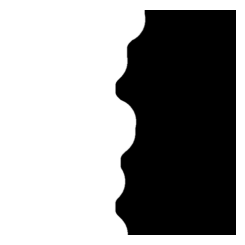

In [ ]:
# 큰 구조 요소 정의 (밝은 패치 제거용)
se_large = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (120, 120))

# 얼룩들 간의 밝은 패치 제거 : 열림 연산 수행
eroded = cv2.erode(closed, se_large)
opened = cv2.dilate(eroded, se_large)

# 결과 이미지로 출력
plt.subplot(1, 2, 2)
plt.imshow(opened, cmap='gray')
plt.axis('off')
plt.show()

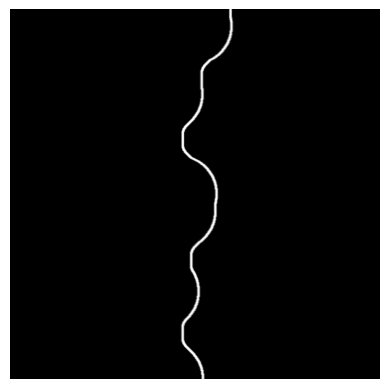

In [ ]:
# 경계 구조 요소 정의 (경계 추출용)
se_grad = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# 형태학적 기울기 연산
gradient = cv2.morphologyEx(opened, cv2.MORPH_GRADIENT, se_grad)

# 결과 이미지로 출력
plt.imshow(gradient, cmap='gray')
plt.axis('off')
plt.show()

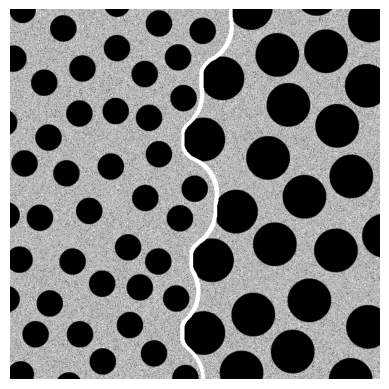

In [ ]:
final = img.copy()    # 경계 추출 이미지를 덮어씌위기 위해 이미지 복사
final[gradient > 0] = 255    # gradient 값이0보다 큰 위치는 경계이므로, 해당 위치를 흰색으로 강조

# 결과 이미지로 출력
plt.imshow(final, cmap='gray')
plt.axis('off')
plt.show()